## Arquitectura LeNet-5 para Digits-MNIST

In [ ]:
# importa las librerías
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.metrics import classification_report
import time
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as model_selection

In [ ]:
# carga el conjunto de datos de dígitos MNIST
data_mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = data_mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# despliega las dimensiones de los arreglos
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
# mapea etiqueta a nombre
dicc = {0:"Cero",1:"Uno",2:"Dos",3:"Tres",4:"Cuatro", 
        5:"Cinco",6:"Sesi",7:"Siete",8:"Ocho",9:"Nueve"}
dicc

{0: 'Cero',
 1: 'Uno',
 2: 'Dos',
 3: 'Tres',
 4: 'Cuatro',
 5: 'Cinco',
 6: 'Sesi',
 7: 'Siete',
 8: 'Ocho',
 9: 'Nueve'}

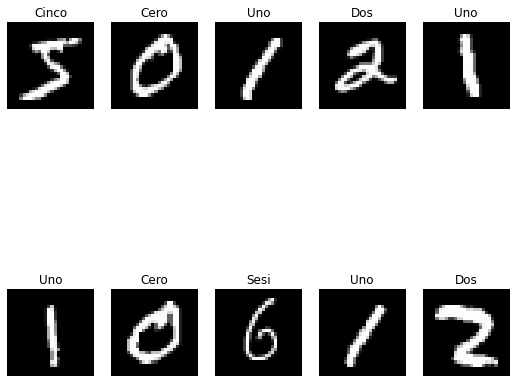

In [ ]:
# despliega algunas imágenes del dataset
cc = [0,1,3,5,6,8,21,18,23,28]  # un ejemplo de cada clase/objeto.
fig=plt.figure(figsize=(9,9)) # figure size, inches
k=1
for i in cc:
  fig.add_subplot(2, 5, k)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(dicc[y_train[i]])
  plt.axis('off')
  k += 1

In [ ]:
# normaliza las intensidades de los pixeles de las imágenes 
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
# convierte etiquetas de clase enteras en código binario (one hot)
ytrain = tf.keras.utils.to_categorical(y_train)
ytest = tf.keras.utils.to_categorical(y_test)
print(y_train[0])
print(ytrain[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
labels = ["0","1","2","3","4","5","6","7","8","9"]

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# crea el modelo LeNet-5
model = tf.keras.models.Sequential([

   # C1: feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),

   # S2: Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   # C3: feature maps: Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='tanh'),

   # S4: Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   # C5: Flatten & Fully connection:
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(120, activation='tanh'),

   # F6: Fully conection:
   tf.keras.layers.Dense(84, activation='tanh'),

   #Output: Softmax   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])

In [ ]:
# define algunos hiper-parámetros
n_epochs=20
n_batch=64
learning_rate=0.01
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [ ]:
# configura el modelo para entrenamiento
model.compile(optimizer=opt, 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [ ]:
# Entrena el modelo para un número fijo de épocas
Historia = model.fit(x_train, ytrain, validation_data=(x_test, ytest),
                     epochs=n_epochs, batch_size=n_batch)

Epoch 1/20
938/938 [==============================] - 14s 5ms/step - loss: 0.7757 - accuracy: 0.7998 - val_loss: 0.3128 - val_accuracy: 0.9224
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2599 - accuracy: 0.9306 - val_loss: 0.1959 - val_accuracy: 0.9470
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1840 - accuracy: 0.9484 - val_loss: 0.1456 - val_accuracy: 0.9586
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1456 - accuracy: 0.9589 - val_loss: 0.1183 - val_accuracy: 0.9654
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1214 - accuracy: 0.9653 - val_loss: 0.0994 - val_accuracy: 0.9709
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1044 - accuracy: 0.9704 - val_loss: 0.0891 - val_accuracy: 0.9747
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0923 - accuracy: 0.9737 - val_loss: 0.0776 - val_accuracy: 0.9778
Epoch

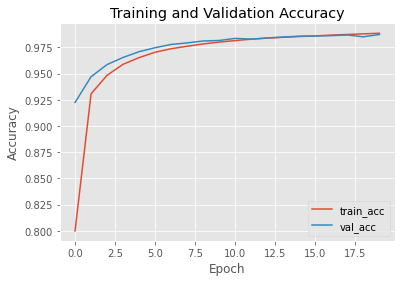

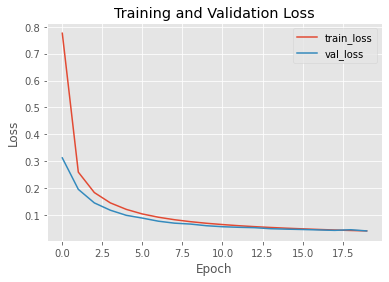

In [ ]:
# Despliega las curvas de aprendizaje
H = Historia
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss") 
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
# estadísticas de desempeño de la red
predictions = model.predict(x_test, batch_size=n_batch)
print(classification_report(ytest.argmax(axis=1), 
      predictions.argmax(axis=1),target_names=labels))

157/157 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Matriz de confusión
confusion_matrix(ytest.argmax(axis=1), predictions.argmax(axis=1))

array([[ 974,    0,    1,    0,    0,    0,    2,    1,    2,    0],
       [   0, 1129,    2,    0,    0,    0,    1,    2,    1,    0],
       [   1,    3, 1022,    2,    0,    0,    0,    3,    1,    0],
       [   0,    0,    3,  995,    0,    5,    0,    2,    3,    2],
       [   0,    0,    1,    0,  967,    0,    4,    3,    2,    5],
       [   1,    0,    0,    3,    0,  881,    4,    1,    2,    0],
       [   3,    4,    0,    0,    1,    1,  947,    0,    2,    0],
       [   0,    3,    8,    3,    0,    0,    0, 1012,    1,    1],
       [   4,    0,    4,    3,    2,    0,    1,    2,  955,    3],
       [   2,    2,    0,    3,    5,    1,    0,    3,    2,  991]])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
# Cantidad de parámetros de la red
print("Parámetros del Layer conv2d: " + str( 1 * (5*5) * 6 + 6 ))  
print("Parámetros del Layer conv2d_1: " + str( 6 * (5*5) * 16 + 16 ))  
print("Parámetros del Layer dense_1_1: " + str( 16 * (5*5) * 120 + 120 )) 
print("Parámetros del Layer dense_1_1: " + str( 120 * (84) + 84 )) 
print("Parámetros del Layer conv2d_1: " + str( 84 * (10) + 10 )) 

Parámetros del Layer conv2d: 156
Parámetros del Layer conv2d_1: 2416
Parámetros del Layer dense_1_1: 48120
Parámetros del Layer dense_1_1: 10164
Parámetros del Layer conv2d_1: 850


# Datos Cifar10

In [ ]:
# importa las librerías
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.metrics import classification_report
import time
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as model_selection

import datetime

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

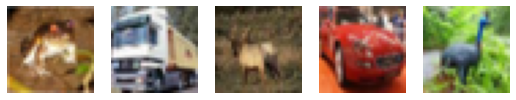

In [ ]:
# despliega algunas imágenes del dataset
cc = [0,1,3,5,6]  # un ejemplo de cada clase/objeto.
fig=plt.figure(figsize=(9,9)) # figure size, inches
k=1
for i in cc:
  fig.add_subplot(1, 5, k)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')
  k += 1

In [ ]:
# normaliza las intensidades de los pixeles de las imágenes 
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
# convierte etiquetas de clase enteras en código binario (one hot)
ytrain = tf.keras.utils.to_categorical(y_train)
ytest = tf.keras.utils.to_categorical(y_test)
print(y_train[0])
print(ytrain[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
labels = ["0","1","2","3","4","5","6","7","8","9"]

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
# crea el modelo LeNet-5
model = tf.keras.models.Sequential([


   tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), activation='relu'),
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
   tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), activation='relu'),
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
   tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), activation='relu'),

   # C5: Flatten & Fully connection:
   tf.keras.layers.Flatten(),

      # F6: Fully conection:
   tf.keras.layers.Dense(64, activation='relu'),

   tf.keras.layers.Dense(32, activation='relu'),

   #Output: Softmax   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])

In [ ]:
# define algunos hiper-parámetros
n_epochs=100
n_batch=32
learning_rate=0.01
opt_sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)
opt_adamax = tf.keras.optimizers.Adamax(learning_rate=learning_rate)

In [ ]:
# configura el modelo para entrenamiento
model.compile(optimizer=opt_sgd, 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
# Entrena el modelo para un número fijo de épocas
with tf.device('/device:GPU:0'):
    Historia = model.fit(x_train, ytrain, validation_data=(x_test, ytest),
                        epochs=n_epochs, batch_size=n_batch,
                        callbacks=[stop_early])

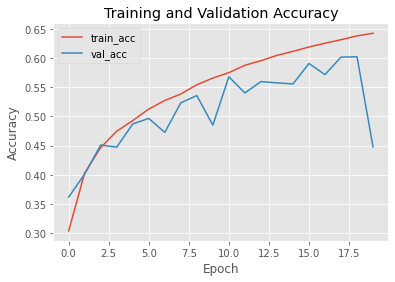

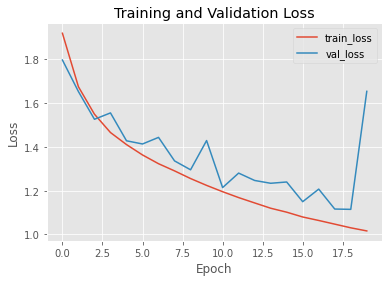

In [ ]:
# Despliega las curvas de aprendizaje
H = Historia
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss") 
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
# estadísticas de desempeño de la red
predictions = model.predict(x_test, batch_size=n_batch)
print(classification_report(ytest.argmax(axis=1), 
      predictions.argmax(axis=1),target_names=labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.98      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Matriz de confusión
confusion_matrix(ytest.argmax(axis=1), predictions.argmax(axis=1))

array([[ 970,    0,    3,    0,    0,    1,    2,    1,    3,    0],
       [   0, 1128,    1,    1,    0,    1,    1,    1,    2,    0],
       [   2,    1, 1021,    1,    0,    0,    0,    4,    3,    0],
       [   0,    0,    3,  998,    0,    3,    0,    2,    1,    3],
       [   0,    0,    2,    0,  964,    0,    3,    1,    1,   11],
       [   1,    0,    0,   10,    0,  877,    1,    1,    1,    1],
       [   6,    2,    1,    0,    1,    4,  942,    0,    2,    0],
       [   1,    3,    6,    6,    0,    0,    0, 1006,    2,    4],
       [   2,    0,    4,    5,    1,    2,    0,    2,  957,    1],
       [   3,    2,    0,    6,    4,    2,    0,    2,    2,  988]])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
# Cantidad de parámetros de la red
print("Parámetros del Layer conv2d: " + str( 1 * (5*5) * 6 + 6 ))  
print("Parámetros del Layer conv2d_1: " + str( 6 * (5*5) * 16 + 16 ))  
print("Parámetros del Layer dense_1_1: " + str( 16 * (5*5) * 120 + 120 )) 
print("Parámetros del Layer dense_1_1: " + str( 120 * (84) + 84 )) 
print("Parámetros del Layer conv2d_1: " + str( 84 * (10) + 10 )) 

Parámetros del Layer conv2d: 156
Parámetros del Layer conv2d_1: 2416
Parámetros del Layer dense_1_1: 48120
Parámetros del Layer dense_1_1: 10164
Parámetros del Layer conv2d_1: 850
